In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string
import nltk


In [ ]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer as CV
from sklearn.feature_extraction.text import TfidfVectorizer

#Data Loading

In [ ]:
train_data = pd.read_csv("/content/drive/MyDrive/CodeSoft /Movie Genre/archive/Genre Classification Dataset/train_data.txt", sep=':::', names=["title", "genre", "description"], engine='python')
test_data = pd.read_csv("/content/drive/MyDrive/CodeSoft /Movie Genre/archive/Genre Classification Dataset/test_data.txt", sep=':::', names=["title", "description"], engine='python')

In [ ]:
train_data.head()

,title,genre,description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [ ]:
test_data.head()

,title,description
1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),Before he was known internationally as a mart...


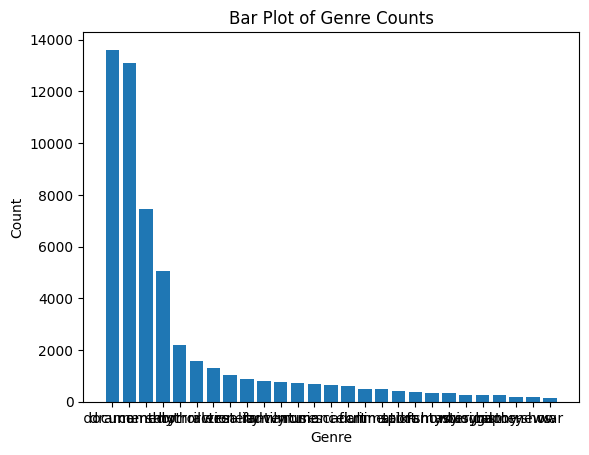

In [ ]:
import matplotlib.pyplot as plt
genre_counts = train_data['genre'].value_counts()
plt.bar(genre_counts.index, genre_counts.values)
plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Bar Plot of Genre Counts")
plt.show()


In [ ]:
train_data.describe()

,title,genre,description
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [ ]:
train_data.genre.value_counts()

genre
 drama           13613
 documentary     13096
 comedy           7447
 short            5073
 horror           2204
 thriller         1591
 action           1315
 western          1032
 reality-tv        884
 family            784
 adventure         775
 music             731
 romance           672
 sci-fi            647
 adult             590
 crime             505
 animation         498
 sport             432
 talk-show         391
 fantasy           323
 mystery           319
 musical           277
 biography         265
 history           243
 game-show         194
 news              181
 war               132
Name: count, dtype: int64

#Cleaning & Pre-Processing

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        54214 non-null  object
 1   genre        54214 non-null  object
 2   description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [ ]:
train_data.isnull().sum()

title          0
genre          0
description    0
dtype: int64

In [ ]:
print("shape before drop nulls",train_data.shape)
train_data.dropna(inplace=True)
print("shape after drop nulls",train_data.shape)

shape before drop nulls (54214, 3)
shape after drop nulls (54214, 3)


#Text Cleaning

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
stop_words = set(stopwords.words('english'))
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]','',text)
    text = re.sub(r'\d+','',text)
    text = re.sub(r'\s+', ' ', text)
    text = [word for word in text.split() if word not in stop_words]
    text = ' '.join(text)
    return text

#Data Statistics

In [ ]:
train_data['description'] = train_data['description'].apply(clean_text)
test_data['description'] = test_data['description'].apply(clean_text)

In [ ]:
st = PorterStemmer()
train_data['description'] = train_data['description'].apply(lambda x: ' '.join([st.stem(word) for word in x.split()]))
test_data['description'] = test_data['description'].apply(lambda x: ' '.join([st.stem(word) for word in x.split()]))

In [ ]:
train_data['lenghts'] = train_data['description'].apply(len)
test_data['lenghts'] = test_data['description'].apply(len)
train_data.head()

,title,genre,description,lenghts
1,Oscar et la dame rose (2009),drama,listen convers doctor parent yearold oscar lea...,337
2,Cupid (1997),thriller,brother sister past incestu relationship curre...,111
3,"Young, Wild and Wonderful (1980)",adult,bu empti student field trip museum natur histo...,344
4,The Secret Sin (1915),drama,help unemploy father make end meet edith twin ...,675
5,The Unrecovered (2007),drama,film titl refer unrecov bodi ground zero also ...,360


In [ ]:
print("Average Length of Text Before Cleaning: ", train_data['lenghts'].mean())

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text


train_data['description_cleaned'] = train_data['description'].apply(clean_text)


average_length_cleaned = train_data['description_cleaned'].apply(len).mean()
print("Average Length of Text After Cleaning:", average_length_cleaned)

Average Length of Text Before Cleaning:  363.37883203600546
Average Length of Text After Cleaning: 363.1780905301214


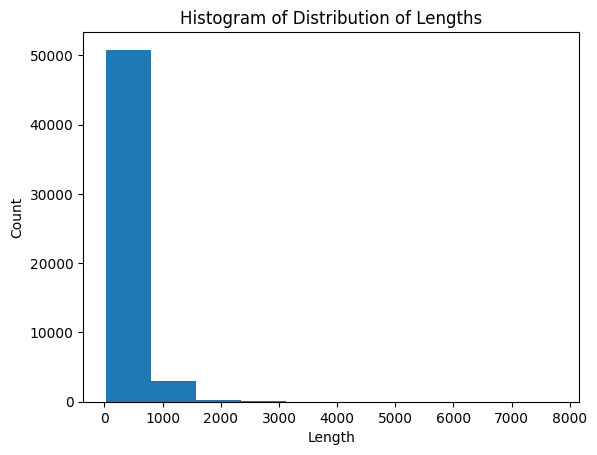

In [ ]:
import matplotlib.pyplot as plt
plt.hist(train_data['lenghts'], bins=10)
plt.xlabel("Length")
plt.ylabel("Count")
plt.title("Histogram of Distribution of Lengths")
plt.show()


In [ ]:
def get_top_n_bigram(corpus, n=None):
    vec = CV(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

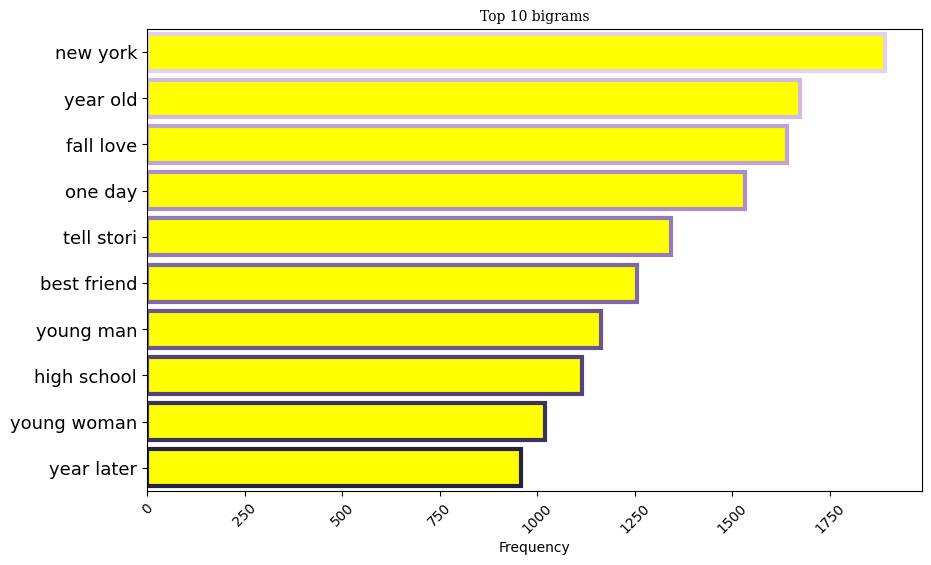

In [ ]:
common_words = get_top_n_bigram(train_data['description_cleaned'], 10)
common_words_df = pd.DataFrame(common_words,columns=['word','freq'])
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='freq', y='word', data=common_words_df,facecolor='yellow',linewidth=3,edgecolor=sns.color_palette("ch:start=3, rot=.1",10))

plt.title("Top 10 bigrams",font='Serif')
plt.xlabel("Frequency", fontsize=10)
plt.yticks(fontsize=13)
plt.xticks(rotation=45, fontsize=10)
plt.ylabel("");

#Label Encodeing & Target Variable

In [ ]:
le = LabelEncoder()
train_data['genre'] = le.fit_transform(train_data['genre'].values)
train_data.head()
train_df = train_data.loc[:,['description_cleaned', 'genre']]


if 'description_cleaned' in test_data.columns:
    test_df = test_data.loc[:,['description_cleaned', 'title']]
else:
    print("Column 'description_cleaned' not found in test_data. Check the column name or data.")

train_df.head(10)

Column 'description_cleaned' not found in test_data. Check the column name or data.


,description_cleaned,genre
1,listen convers doctor parent yearold oscar lea...,8
2,brother sister past incestu relationship curre...,24
3,bu empti student field trip museum natur histo...,1
4,help unemploy father make end meet edith twin ...,8
5,film titl refer unrecov bodi ground zero also ...,8
6,qualiti control consist seri mm singl take sho...,7
7,tough econom time max joey run idea discov sen...,5
8,ron petri keanu reev troubl teen whose life ha...,6
9,sudden calamit event caus great loss life dama...,18
10,four high school student embark terrifi journe...,13


#Train Test Split

In [ ]:
train_set , val_set , train_label , val_label = train_test_split(train_df['description_cleaned'] , train_data['genre'] , test_size=0.2 , shuffle=True , random_state = 42)

print(f'Split data into train and eval sets')
print(f'Trani Set\t: {len(train_set)}\nValidation Set\t: {len(val_set)}')

Split data into train and eval sets
Trani Set	: 43371
Validation Set	: 10843


Feature Extraction

In [ ]:
vectorize = TfidfVectorizer(stop_words='english', max_features=100000)
train_set_tfidf = vectorize.fit_transform(train_set)
val_set_tfidf = vectorize.transform(val_set)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorize = CountVectorizer()
train_set_tfidf = vectorize.fit_transform(train_set)
val_set_tfidf = vectorize.transform(val_set)

##Logistice Regression Model (LR)

In [ ]:
LR_model = LogisticRegression()
LR_model.fit(train_set_tfidf, train_label)
predict_LR = LR_model.predict(val_set_tfidf)
print(classification_report(val_label, predict_LR))
LR_accuracy = accuracy_score(predict_LR,val_label)
print('Logistic Regression accuracy is: {:.2f}%'.format(LR_accuracy*100))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.40      0.32      0.35       263
           1       0.69      0.46      0.55       112
           2       0.28      0.23      0.25       139
           3       0.38      0.21      0.27       104
           4       0.00      0.00      0.00        61
           5       0.51      0.57      0.54      1443
           6       0.30      0.11      0.16       107
           7       0.70      0.75      0.73      2659
           8       0.55      0.67      0.61      2697
           9       0.29      0.18      0.22       150
          10       0.28      0.07      0.11        74
          11       0.70      0.47      0.57        40
          12       0.06      0.02      0.03        45
          13       0.64      0.61      0.63       431
          14       0.54      0.56      0.55       144
          15       0.12      0.04      0.06        50
          16       0.17      0.07      0.10        56
          17       0.20    

#Support Vector Machine Model (SVC)

In [ ]:
from sklearn.svm import LinearSVC
svm_model = LinearSVC()
svm_model.fit(train_set_tfidf, train_label)
predict = svm_model.predict(val_set_tfidf)

print(classification_report(val_label, predict))
svm_accuracy = accuracy_score(predict,val_label)
print('SVC model accuracy is: {:.2f}%'.format(svm_accuracy*100))

              precision    recall  f1-score   support

           0       0.36      0.30      0.33       263
           1       0.49      0.37      0.42       112
           2       0.23      0.19      0.21       139
           3       0.25      0.15      0.19       104
           4       0.00      0.00      0.00        61
           5       0.47      0.51      0.49      1443
           6       0.16      0.11      0.13       107
           7       0.68      0.69      0.69      2659
           8       0.52      0.58      0.55      2697
           9       0.22      0.19      0.20       150
          10       0.19      0.09      0.13        74
          11       0.61      0.47      0.54        40
          12       0.05      0.02      0.03        45
          13       0.54      0.55      0.55       431
          14       0.51      0.53      0.52       144
          15       0.14      0.10      0.12        50
          16       0.07      0.05      0.06        56
          17       0.12    

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


#Multinominal Naive Bayes Model

In [ ]:
NB_model = MultinomialNB()
NB_model.fit(train_set_tfidf, train_label)
y_pred_naive = NB_model.predict(val_set_tfidf)
print(classification_report(val_label, y_pred_naive))
naive_accuracy = accuracy_score(y_pred_naive,val_label)
print('Naive Bayes model accuracy is: {:.2f}%'.format(naive_accuracy*100))

              precision    recall  f1-score   support

           0       0.92      0.04      0.08       263
           1       0.60      0.03      0.05       112
           2       0.37      0.05      0.09       139
           3       0.00      0.00      0.00       104
           4       0.00      0.00      0.00        61
           5       0.52      0.46      0.49      1443
           6       0.00      0.00      0.00       107
           7       0.56      0.89      0.69      2659
           8       0.46      0.82      0.59      2697
           9       0.00      0.00      0.00       150
          10       0.00      0.00      0.00        74
          11       1.00      0.03      0.05        40
          12       0.00      0.00      0.00        45
          13       0.76      0.30      0.43       431
          14       0.73      0.08      0.14       144
          15       0.00      0.00      0.00        50
          16       0.00      0.00      0.00        56
          17       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
